<a href="https://colab.research.google.com/github/Dembelinho/Iris_dataset_linear_regression_gradient_descent/blob/main/R%C3%A9gression_Polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédire la largeur de sépale en fonction de la longueur de pétale

**Importation of libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data= pd.read_csv('iris.csv')

In [ ]:
# Display the first five observations
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# Drop the id and date columns
data = data.drop(['sepal_length', 'petal_width'], axis=1)

In [22]:
len(data.columns)

3

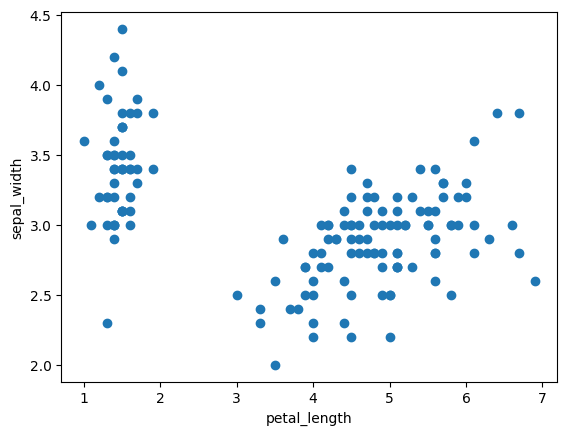

In [4]:
# la longueur de pétale en fonction de la largeur de sépale 
plt.plot(data["petal_length"],data["sepal_width"],'o')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.show()

In [5]:
y=data['sepal_width']
x=data['petal_length']


In [6]:
x.shape

(150,)

In [7]:
y.shape

(150,)

In [8]:
# redimensionner y
y=data.sepal_width.values.reshape(150,1)
print(y.shape)

(150, 1)


In [9]:
# Création de la matrice X, inclut le Biais
x=data.petal_length.values.reshape(150,1)

X = np.hstack((x, np.ones((150,1))))

# ajoute le vecteur x^2 a la gauche de la matrice X
X = np.hstack((x**2, X))

print(X.shape)

(150, 3)


In [10]:
# Initialisation du vecteur theta aléatoire
theta = np.random.randn(3, 1)

# **Linear Model**

In [11]:
def model(X, theta):
    return X.dot(theta)

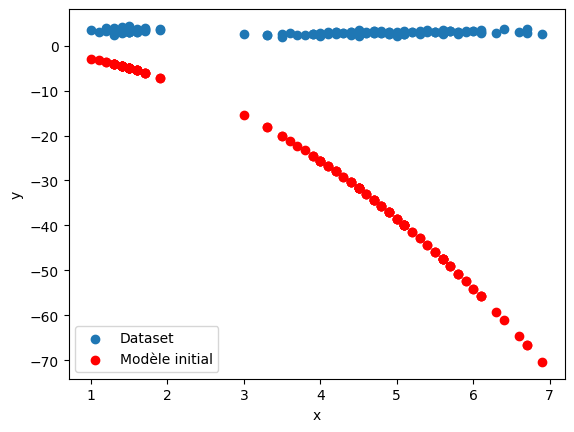

In [12]:
plt.scatter(x, y,label='Dataset')
plt.scatter(x, model(X, theta), c='r',label='Modèle initial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**fonction cost**

In [13]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [17]:
cost_function(X, y, theta)

617.4705465256617

On implémente la formule du gradient pour la MSE. Ensuite on utilise la fonction du Gradien Descent

In [14]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [15]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# Training

In [55]:
n_iterations = 3000
learning_rate = 0.001

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

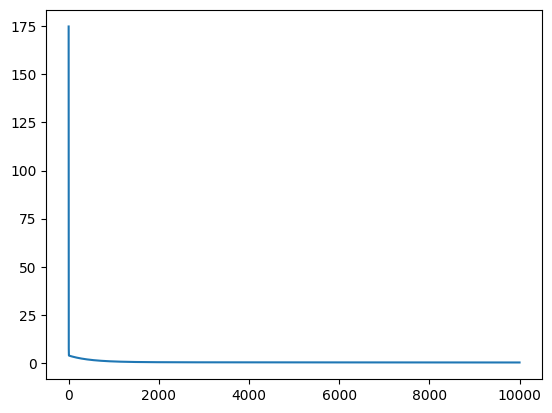

In [47]:
plt.plot(range(n_iterations),cost_history)

In [54]:
cost_history[-1]

0.33839543979508824

In [34]:
theta_final

array([[-0.03978713],
       [ 0.70681538],
       [ 0.45844902]])

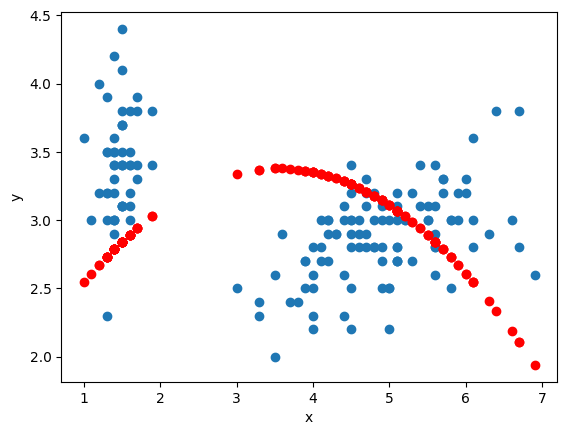

In [50]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Coefficient de détermination

In [37]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [56]:
from sklearn.linear_model import LinearRegression


In [62]:
lr=LinearRegression()
lr.fit(x_try, y)

LinearRegression()

In [60]:
x_try=np.delete(X,2,1)

In [64]:
y_predict= lr.predict(x_try)

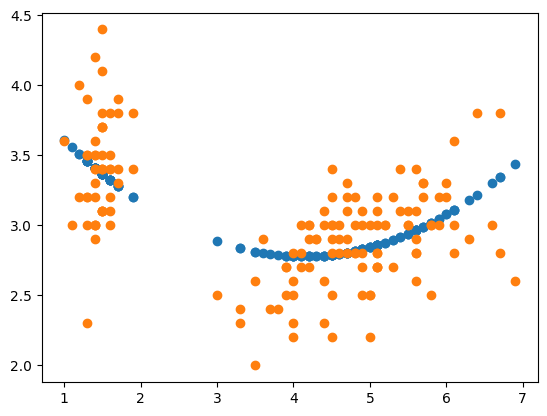

In [66]:
plt.scatter(x,y_predict)
plt.scatter(x,y)